### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [16]:
%pip install matplotlib seaborn scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [71]:
# numeric feat.DataFrame
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# package date conversions for calculating
from datetime import datetime
from datetime import date
from datetime import timedelta

#Packages for OLS, MLR  and Confusion Matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
lr = LinearRegression()

In [72]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Read in data from NYC TLC dataset provided and load into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

# Display "Data loaded" once the data has been loaded

Start with `.shape` and `.info()`.

In [73]:
# Start with `.shape` and `.info()`
data = taxi_data.copy() 

data.shape

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Use `.head()`.

In [74]:
# Use `.head()`
data.head(n = 10)



,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Create `trip_duration`.

In [75]:
# Display data types of `tpep_dropoff_datetime`, `tpep_pickup_datetime`
print("Data type of tpep_dropoff_datetime:", data["tpep_dropoff_datetime"].dtype)
print("Data type of tpep_pickup_datetime:", data["tpep_pickup_datetime"].dtype)

# Convert `tpep_dropoff_datetime` to datetime format
data["drop_off_converted"] = pd.to_datetime(data["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")

# Convert `tpep_pickup_datetime` to datetime format
data["pick_up_converted"] = pd.to_datetime(data["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

# Display data types of `drop_off_converted`, `pick_up_converted`
print("Data type of drop_off_converted:", data["drop_off_converted"].dtype)
print("Data type of pick_up_converted:", data["pick_up_converted"].dtype)

# Compute `trip_duration`
data["trip_duration"] = (data["drop_off_converted"] - data["pick_up_converted"])/np.timedelta64(1,"m")

# Display first ten rows of dataframe after adding the new columns
data.head(10)




Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: object
Data type of drop_off_converted: datetime64[ns]
Data type of pick_up_converted: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [76]:
data.shape
# display shape of duplicate 
print(f"Shape of data with duplicated dropped: {data.drop_duplicates().shape}")

#display total of missing value
print(f"Total count of missing values {data.isna().sum().sum()}")

#display missing value per column in data
data.isna().sum()




Shape of data with duplicated dropped: (22699, 21)
Total count of missing values 0


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
drop_off_converted       0
pick_up_converted        0
trip_duration            0
dtype: int64

Use `.describe()`.

In [77]:
# Display Statistics with A/B Testing
data.describe(include= 'all')




,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,...,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,...,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,2017-06-29 07:49:49.799726848,2017-06-29 07:32:48.973126656,17.013777
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,...,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,2017-01-01 00:17:20,2017-01-01 00:08:25,-16.983333
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,...,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,2017-03-30 03:11:20.500000,2017-03-30 03:09:38.500000,6.650000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,...,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,2017-06-23 12:55:11,2017-06-23 12:35:57,11.183333
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,...,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,2017-10-02 10:53:47,2017-10-02 10:34:34,18.383333
max,1.134863e+08,2.000000,NaN,NaN,6.000000,33.960000,99.000000,NaN,265.000000,265.000000,...,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,2017-12-31 23:49:24,2017-12-31 23:45:30,1439.550000


Create a scatterplot to visualize the relationship between variables of interest.

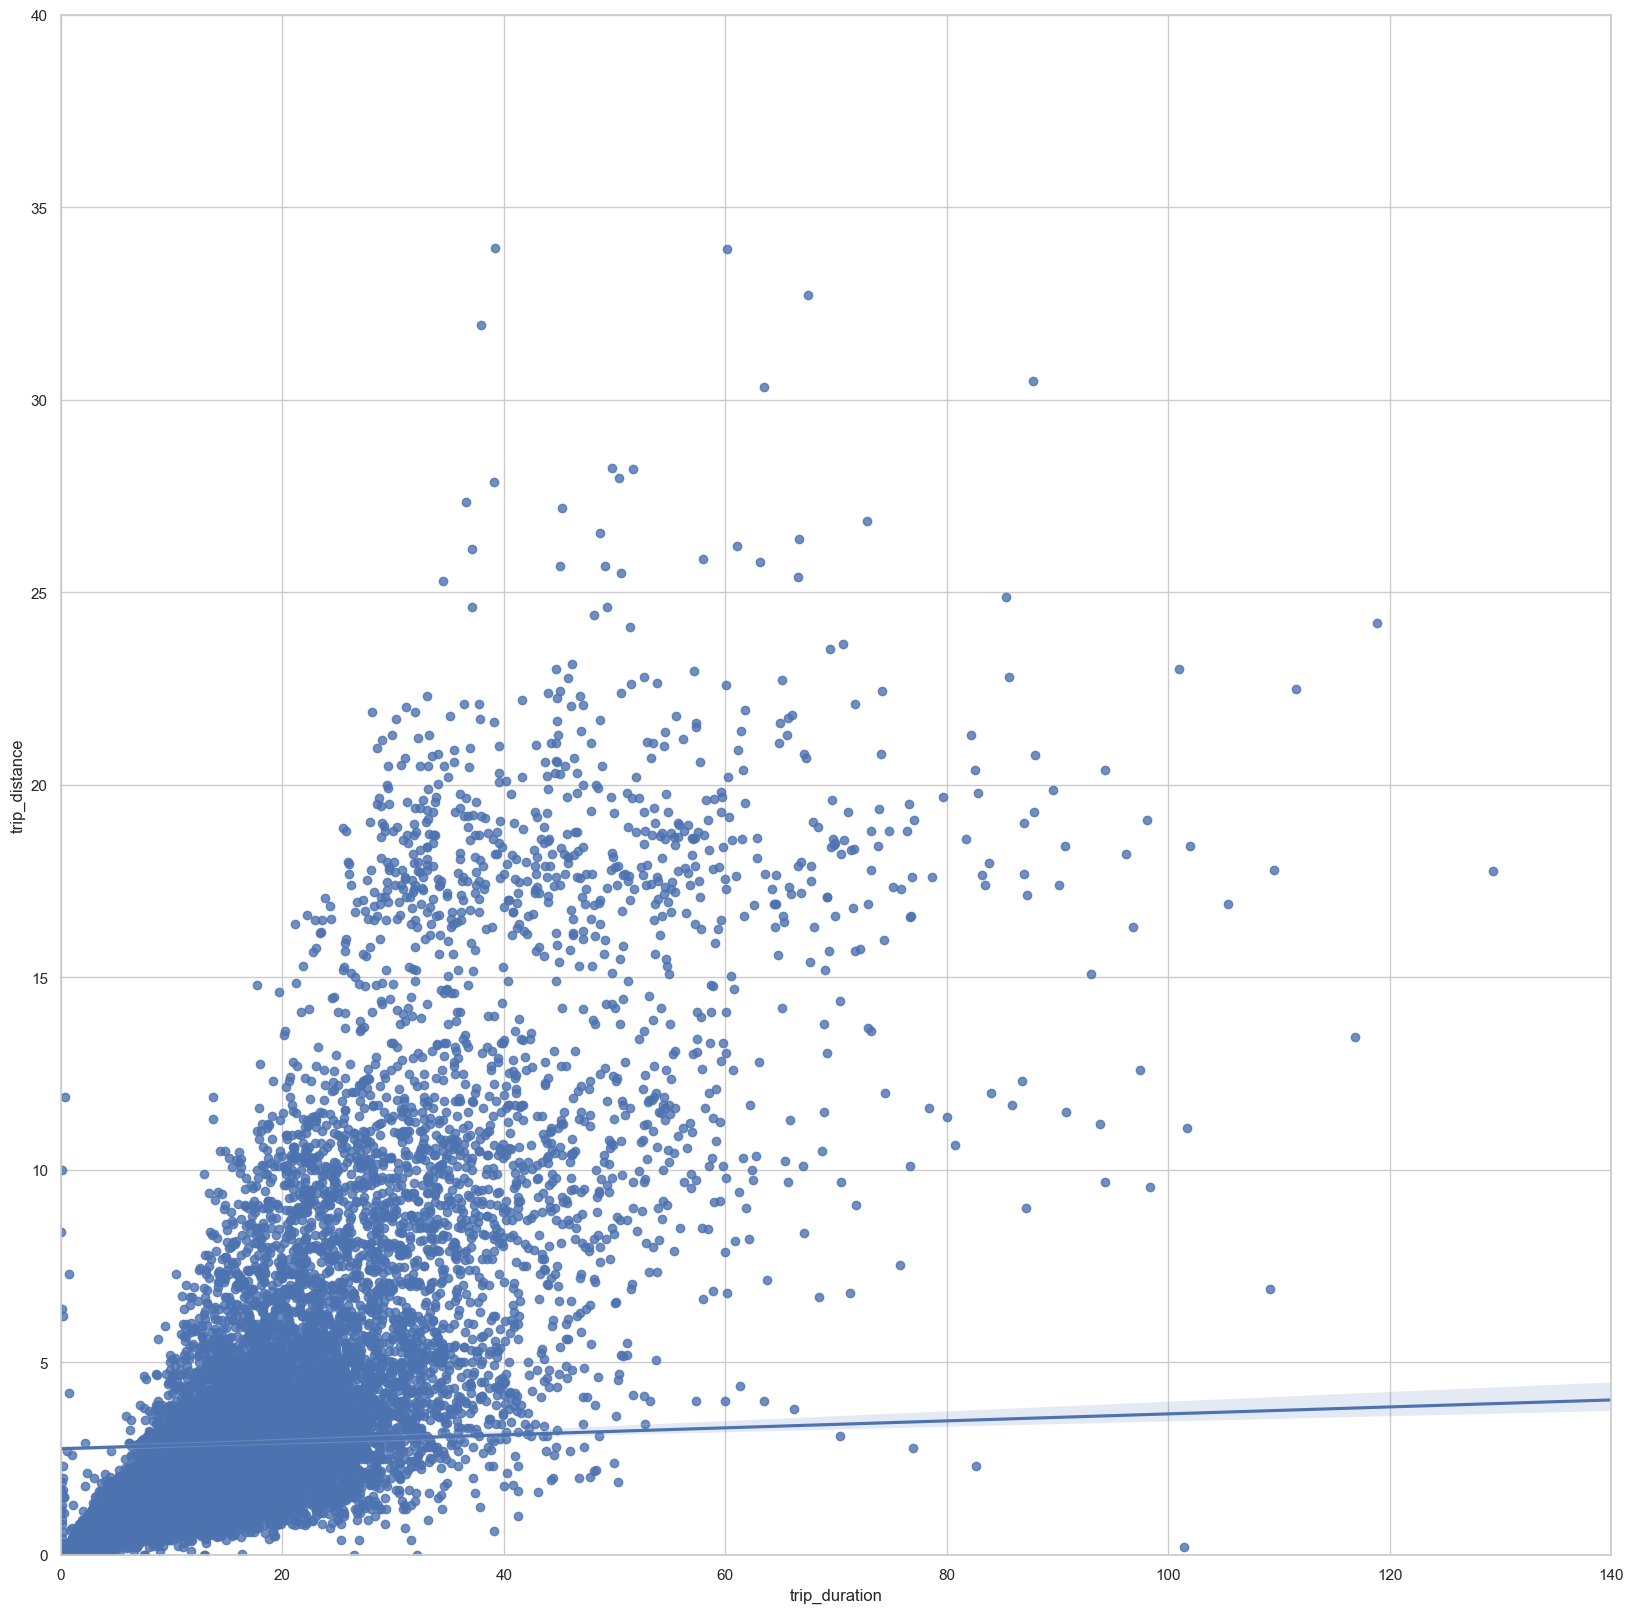

In [78]:
sns.set(style = 'whitegrid')
f = plt.figure()
# set width and heigh of graph
f.set_figwidth(20)
f.set_figheight(20)

sns.regplot(x = data['trip_duration'], y = data['trip_distance'])
# set limit value of x & y axis
plt.ylim(0, 40)
plt.xlim(0, 140)

# remove header object
plt.show()


Create a pairplot to visualize pairwise relationships between relevant variables.

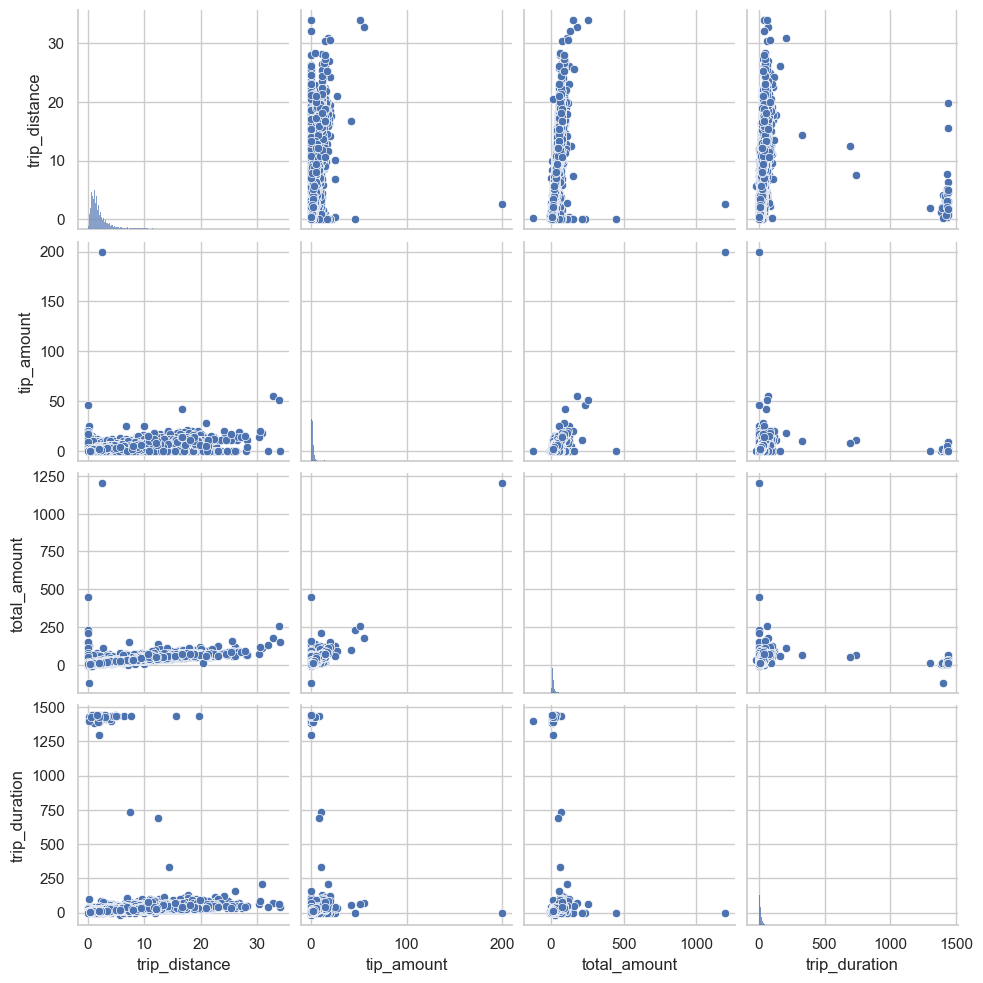

In [79]:
# compare trip of 4 variable with graph
sns.pairplot(data[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration']])

### Task 2b. Address any outliers

Use a boxplot to visualize any outliers.

Text(0.5, 1.0, '4 Variables with Outliers')

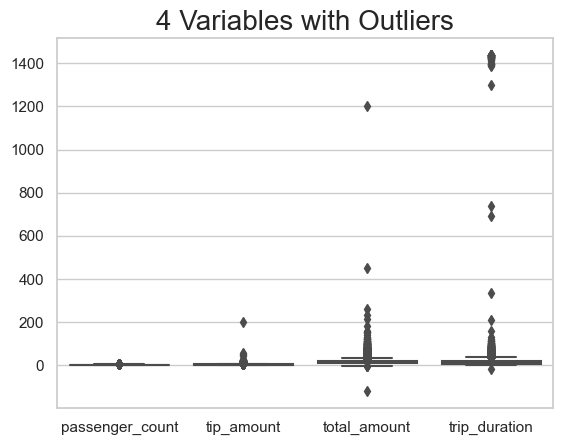

In [80]:

# create boxplot with visualize outlier
g = sns.boxplot(data = data[['passenger_count', 'tip_amount', 'total_amount', 'trip_duration' ]], showfliers = True)

# set title of boxplot
g.set_title('4 Variables with Outliers', fontsize = 20)



Use a boxplot to visualize the distribution of the data without outliers.

Text(0.5, 1.0, '4 Variables without Outliers')

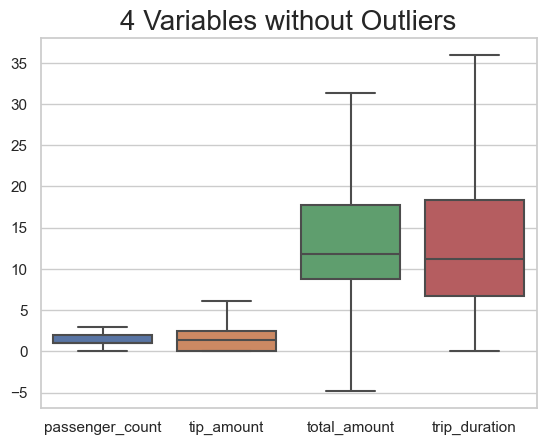

In [81]:
# Create boxplot to visualize distribution of data without outliers

# create boxplot with visualize outlier
g = sns.boxplot(data = data[['passenger_count', 'tip_amount', 'total_amount', 'trip_duration' ]], showfliers = False)

# set title of boxplot
g.set_title('4 Variables without Outliers', fontsize = 20)


Remove outliers as needed.

In [82]:
# Remove outliers in `trip_duration` compute 25th and 75th percentile values
percent_25 = data['trip_duration'].quantile(0.25)
percent_75 = data['trip_duration'].quantile(0.75)

#compute the interquartile range 
iqr = percent_75 - percent_25

#compute the upper limit
upper_limit = percent_75 + 1.5 * iqr

#display upper_limit
print("%.2f"%upper_limit)



35.98


### Task 2c. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [83]:
#remove outliers in trip_duration
# set value greather upperlimit 
# set value less than 0
data[data['trip_duration'] > 36] = 36
data[data['trip_duration'] < 0] = 0

#display descriptive stats after removing outliers
data['trip_duration'].describe()



count    22699.000000
mean        13.668828
std          9.245373
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         36.000000
Name: trip_duration, dtype: float64

Visualize a correlation heatmap of the data.

In [84]:
#compute the 25th and 75th value in total_amount
percent_25 = data['total_amount'].quantile(0.25)
percent_75 = data['total_amount'].quantile(0.75)

#compute the interquartile range
iqr = percent_75 - percent_25

#compute to upperlimit = percent75 + 1.5 * interquartile
upper_limit = percent_75 + 1.5 * iqr

upper_limit


31.375

In [85]:

#remove outlier in total_amount
# set value greather than upperlimit 
# set value less 0 to 0
data[data['total_amount'] > 32] = 32
data[data['total_amount'] < 0] = 0

data['total_amount'].describe()

count    22699.000000
mean        14.481228
std          7.985722
min          0.000000
25%          8.750000
50%         11.800000
75%         17.800000
max         32.000000
Name: total_amount, dtype: float64

### Task 3a. Select outcome variable and features

Set your Y and X variables. Y represents the outcome variable, and X represents the features.

In [93]:
# Set your Y and X variables

# Set Y variable
Y = data[["trip_duration"]]

# Remove the target column from the features
X = data.drop(columns="trip_duration")

# Display first few rows
X.head()
data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
drop_off_converted        object
pick_up_converted         object
trip_duration            float64
dtype: object

### Task 3b. Pre-process data

To help with processing time, consider dropping irrelevant and redundant columns.

In [99]:
# Pre-process data to drop column

columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                   'drop_off_converted', 'pick_up_converted']
X = X.drop(columns_to_drop, axis=1)
X = X.loc[:, ~X.columns.str.contains("Unnamed")]
X.head()


,Unnamed: 0,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,24870114,3.34,1,1,0.0,0.5,2.76,0.0,0.3
1,35634249,1.80,1,1,0.0,0.5,4.00,0.0,0.3
2,106203690,1.00,1,1,0.0,0.5,1.45,0.0,0.3
3,38942136,3.70,1,1,0.0,0.5,6.39,0.0,0.3
4,30841670,4.37,1,2,0.5,0.5,0.00,0.0,0.3


Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [100]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)
print(f"X scaled: {X_scaler}")


X scaled: [[-0.73075587 -0.18151313 -0.33715766 ... -0.18534559 -0.33822608
  -0.33681081]
 [-0.42748204 -0.34881939 -0.33715766 ... -0.05279377 -0.33822608
  -0.33681081]
 [ 1.56077476 -0.43573173 -0.33715766 ... -0.32538018 -0.33822608
  -0.33681081]
 ...
 [ 0.66021276 -0.49874318 -0.33715766 ... -0.48038029 -0.33822608
  -0.33681081]
 [ 0.26513339 -0.28798075 -0.33715766 ... -0.29865602 -0.33822608
  -0.33681081]
 [-0.94660622 -0.31622726 -0.33715766 ... -0.22917321 -0.33822608
  -0.33681081]]


### Task 3c. Build model

Create training and testing sets.

In [101]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X_scaler, Y, test_size = 0.2, random_state= 42)

In [102]:
X_train.shape

(18159, 9)

In [103]:
X_test.shape

(4540, 9)

Build and fit your model to the data.

In [104]:
# Build and fit your model to the data
### YOUR CODE HERE ###
lr.fit(X_train, y_train)


LinearRegression()

### Task 3d. Evaluate model

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [108]:
# Evaluate the model performance on the training data

r_sq = lr.score(X_train, y_train)
print("Coefficient : {:.2f}".format(r_sq))
y_pred = lr.predict(X_train)
print(f"R^2", "%.2f"%r2_score(y_train, y_pred))
print(f"MAE", "%.2f"%mean_absolute_error(y_train, y_pred))
print(f"MSE", "%.2f"%mean_squared_error(y_train, y_pred))

Coefficient : 0.74
R^2 0.74
MAE 3.23
MSE 21.11


In [109]:
# Evaluate the model performance on the testing data

r_sq = lr.score(X_test, y_test)
print("Coefficient : {:.2f}".format(r_sq))
y_pred_test = lr.predict(X_test)
print(f"R^2", "%.2f"%r2_score(y_test, y_pred_test))
print(f"MAE", "%.2f"%mean_absolute_error(y_test, y_pred_test))
print(f"MSE", "%.2f"%mean_squared_error(y_test, y_pred_test))


Coefficient : 0.74
R^2 0.74
MAE 3.22
MSE 20.77


### Task 4a. Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [111]:
# Create a `results` dataframe

result_df = pd.DataFrame(data = {
	"actual": y_test['trip_duration'],
	"predicted": y_pred_test.ravel()})

result_df['residual'] = result_df['actual'] - result_df['predicted']

result_df.head()

,actual,predicted,residual
9199,19.266667,11.872356,7.394311
4955,5.066667,10.139776,-5.073110
16833,18.650000,11.377734,7.272266
13244,23.200000,25.648265,-2.448265
1063,11.516667,19.755651,-8.238984


### Task 4b. Visualize model results

Create a scatterplot to visualize `predicted` over `actual`.

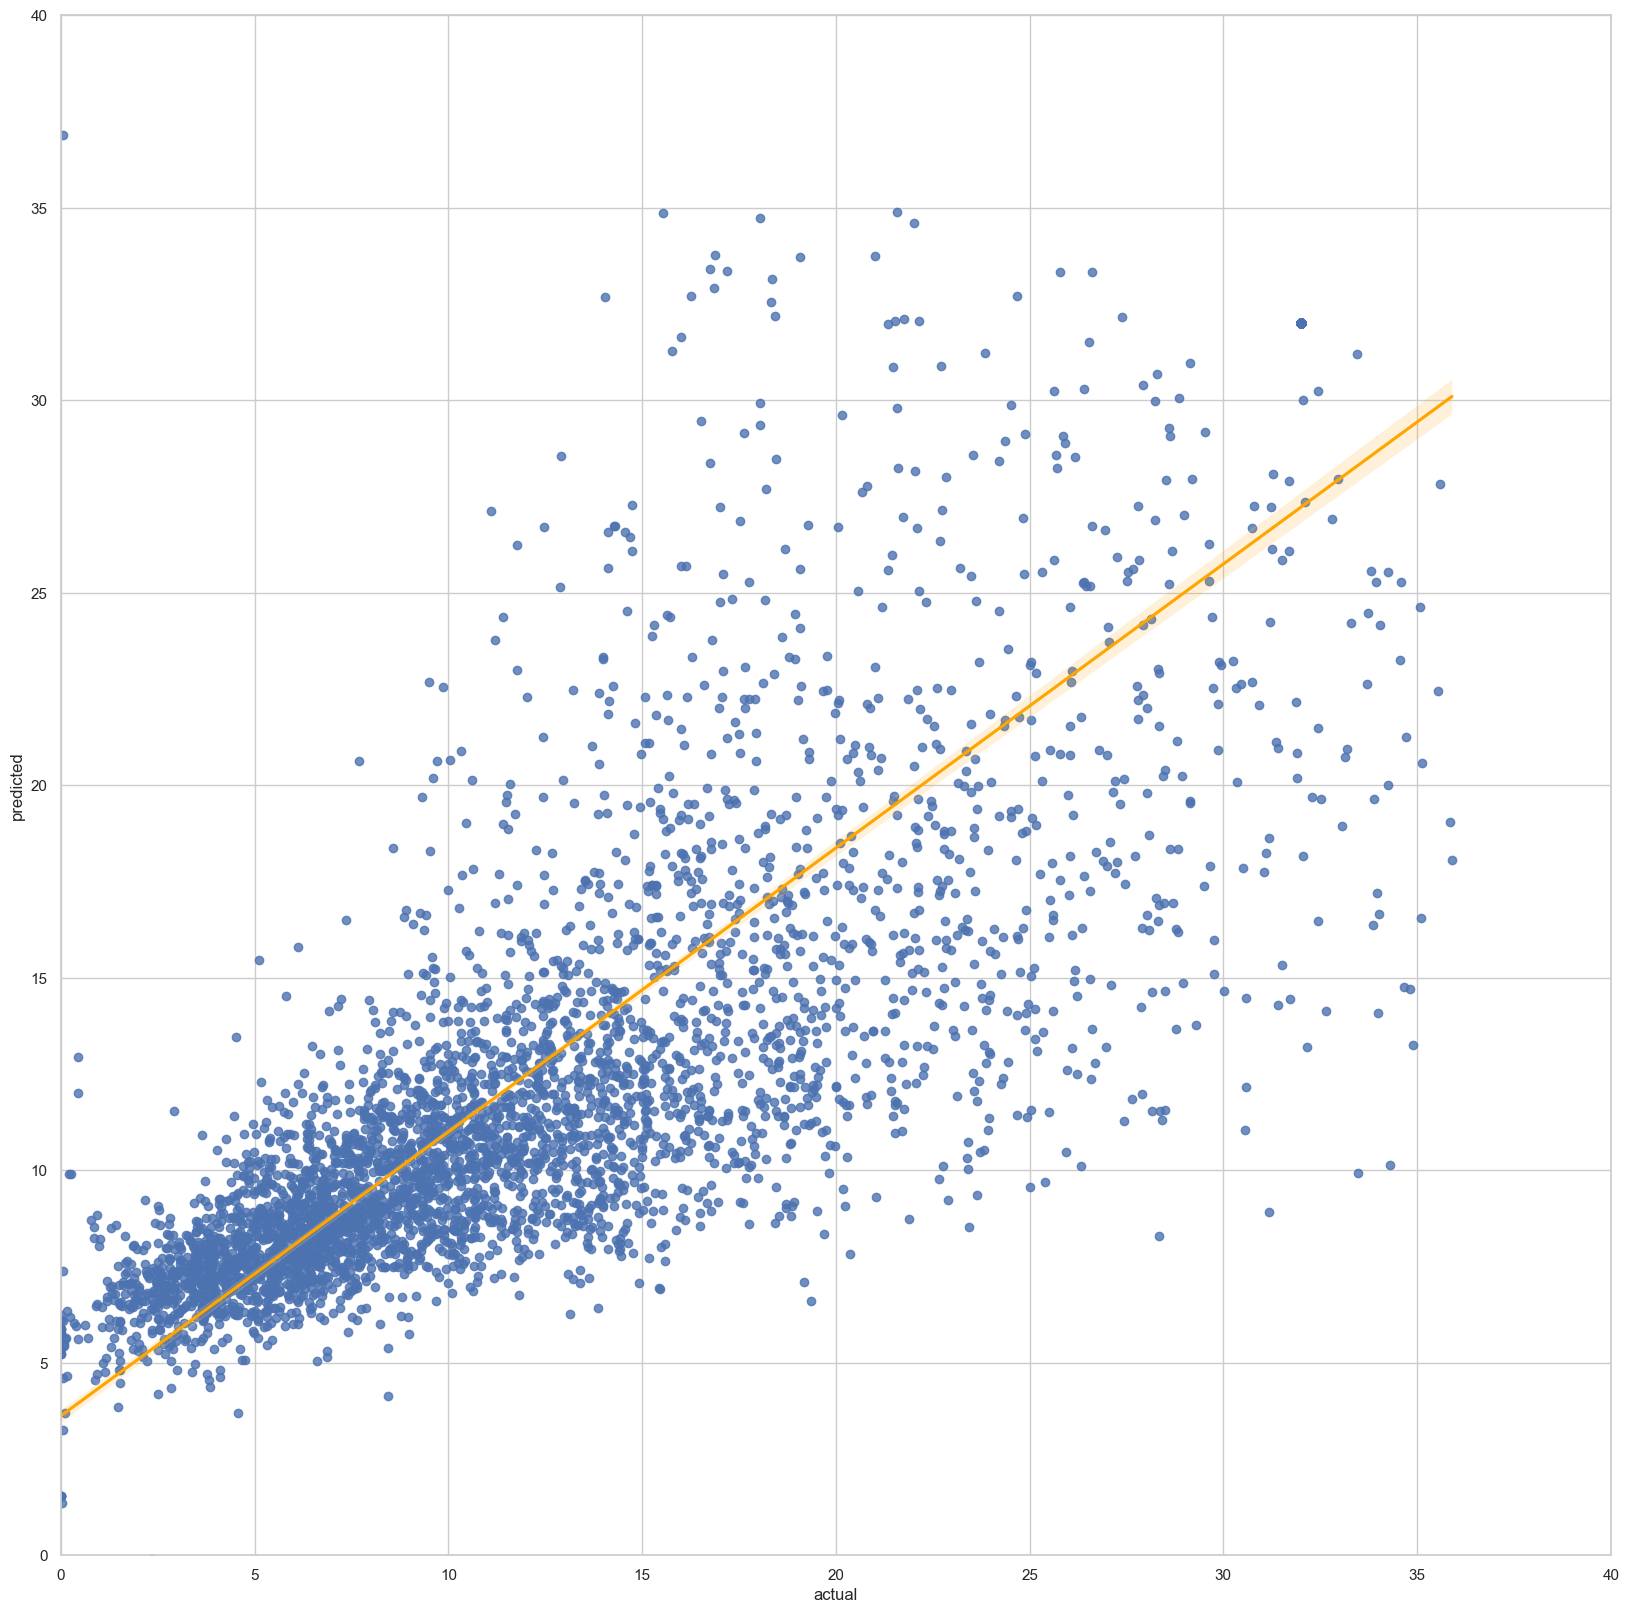

In [113]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.set(style = 'whitegrid')

f = plt.figure()
f.set_figheight(20)
f.set_figwidth(20)

# plot regression with actual vs predict in data
sns.regplot(x = result_df['actual'], y = result_df['predicted'], line_kws={'color':'orange'})

# set limit of value
plt.ylim(0, 40)
plt.xlim(0, 40)

#  remove object header
plt.show()


Visualize the distribution of the `residuals`.

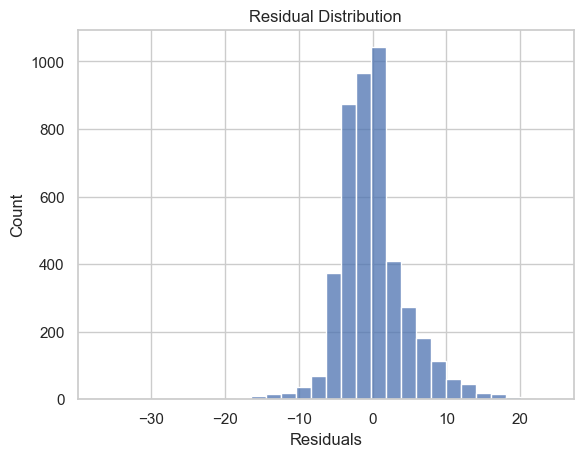

In [114]:
# Visualize the distribution of the `residuals`
sns.histplot(result_df['residual'], bins = 30)

plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residual Distribution')

plt.show()

Create a scatterplot of `residuals` over `predicted`.

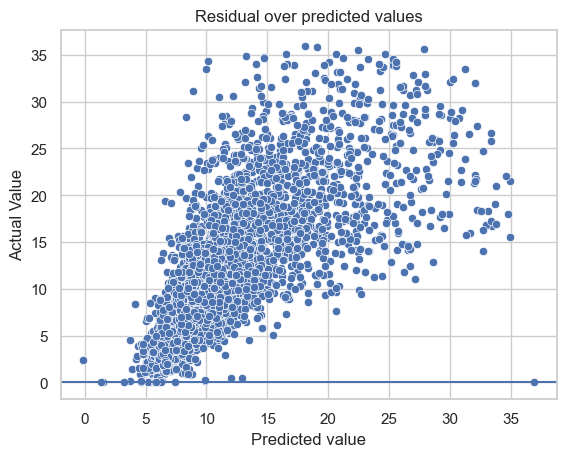

In [115]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(data = result_df, x = 'predicted', y = 'actual')
plt.axhline(0)

plt.title("Residual over predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")

plt.show()
